## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

RNG 
- no pattern-ish 
- Read Ram at a fixed spot -> 0xAABBCCDD 
    - Bad ->polling fast -> some number -> not enough entropy 
- Read temp 
- Can't make it to give same set of number -> depend on computer -> np.random.seed(1234) fixed the result 

Linear Congruence


#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod 2^{31}$$

pick a random $a$ and $b$ then try.

- a,b,modulo -> coprime  (should be prime number)
- a,b large enough
- seed x=0
- 31 for long cycle length 

In [18]:
# https://en.wikipedia.org/wiki/Linear_congruential_generator

a = 1664525
b = 1013904223
x = 216
for i in range(100):
    x = (a*x+b)%(2**32)     #2**31 a large prime number 
#     print(x%17)             #%17 for larger cycle length 

#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

In [7]:
from numpy.random import random, randint, randn
random()

0.7549993463771073

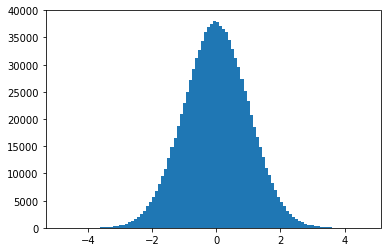

In [8]:
x = np.random.randn(1000000)      #prob of each num is not equal 
plt.hist(x,bins=100);

#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

[0,1) x5 --> [0,5) 

[0,1) x2 --> [0,2) -1 --> [-1,1) 

scale and shift >> avoid many integral problem 

mean 0, std 1 --> shift +5 --> mean 5, std 1

mean 0, std 1 --> scale x10  --> mean 0, std 10

mean 0, std 1 --> scale x 10, shift +2 --> mean 2, std 10


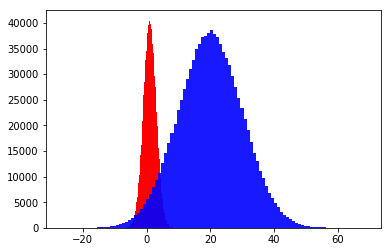

In [9]:
#x = mu + sigma * np.random.randn(437)

x = np.random.randn(1000000)*2+1      #prob of each num is not equal 
plt.hist(x,bins=100,color='red');
y = np.random.randn(1000000)*10+20      #prob of each num is not equal 
plt.hist(y,bins=100,color='blue',alpha=0.9);

6) What does np.random.seed do?

In [10]:
np.random.seed(12345)
np.random.random(5)

array([ 0.92961609,  0.31637555,  0.18391881,  0.20456028,  0.56772503])

In [11]:
np.random.random(5)*2-1

array([ 0.19108941,  0.92902904,  0.30635419,  0.49781328,  0.30713974])

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [12]:
n = 10000000
x = np.random.random(n)*2-1
y = np.random.random(n)*2-1
z = np.random.random(n)*2-1
print(np.sum(x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z))*8./n)

16.0812869183


#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

sum just the sphere, only the certain point within the sphere 

In [16]:
n = 1000000
x = np.random.random(n)*2-1
y = np.random.random(n)*2-1
z = np.random.random(n)*2-1
def f(x,y,z):
    return (x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z))
ans = sum([f(x,y,z)*8./n for x,y,z in zip(x,y,z) if (x**2+y**2+z**2<=1)])
print(ans)

print (np.sum([(x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z))*8./n for x,y,z in zip(x,y,z) if (x**2+y**2+z**2<=1)]))

3.9697508464
3.9697508464


In [15]:
print(x)

[ 0.92033953 -0.08581247  0.38343398 ...,  0.42137298  0.92486484
  0.16813914]


3) Do we guarantee to get the same answer when we repeat the experiment?

Not a predictable result --> rendom in nature 

answer will have some mean and standard deviation

measure width of the distribution(standard deviation)  ~ error   --> mean : true answer 

the more width of dstbution -> more far away from true answer 

compute varaince of real anwser $E[(x-\overline{x})^2]$

4) What do we need to do to guarantee the same answer?

In [ ]:
compare the error

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

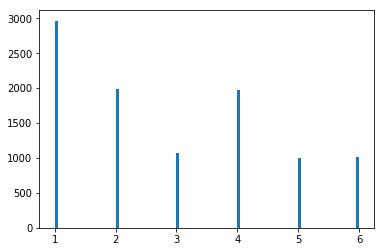

In [138]:
def dice():
    x = np.random.rand()
    if x<0.3:
        return 1
    elif x<0.5:
        return 2
    elif x<0.6:
        return 3
    elif x<0.8:
        return 4
    elif x<0.9:
        return 5
    else:
        return 6

x = [dice() for i in range(10000)] 
plt.hist(x, bins=100);

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [145]:
sum(dice() for i in range(10000))/10000.

2.9125

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [142]:
sum([dice()+dice() for i in range(10000)])/10000

5.7387

4) What is the expected value of $AB$?

In [146]:
sum(dice()*dice() for i in range(10000))/10000


8.3419

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

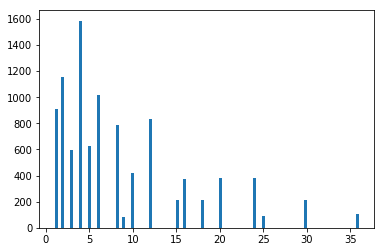

In [153]:
x = [dice()*dice() for i in range(10000)] 
plt.hist(x, bins=100);

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [159]:
def games_of_two():
    n = 0
    for i in range(10000):
        pp = dice()*dice()
        lm = dice()*dice()
        if pp==lm:
            n+=1
    return n/10000.
print(game())

0.0839


7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [161]:
def games_of_product_dice():
    n=0
    for i in range(10000):
        pp = 3*dice()
        lm = dice()*dice()
        if pp>lm:
            n+=1
    return n/10000.
print(games_of_product_dice())

0.5415


### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [3]:
def next_price(s,mu,sigma,dt):    # s= today price 
    e = np.random.randn()
    return s+s*(mu*dt+e*sigma*math.sqrt(dt))

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

In [4]:
def gen_1year(mu, sigma):    #price[] of 1 year trading  
    ret = []
    ndays = 252
    s = 119.21
    dt = 1./ndays
    ret.append(s)
    for i in range(ndays-1):
        s = next_price(s,mu,sigma,dt)
        ret.append(s)
    return ret

prices = gen_1year(0.0877,0.28)
plt.plot(prices)

In [20]:
aapl = [gen_1year(0.0877,0.28) for i in range(5000)]

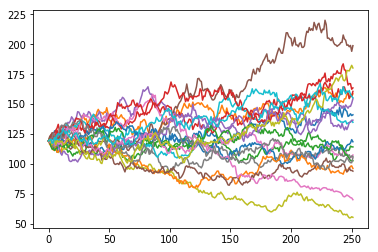

In [14]:
for i in range(20):
    plt.plot(aapl[i])

3) What is the expected value of the stock at the end of year?

129.66471699999997


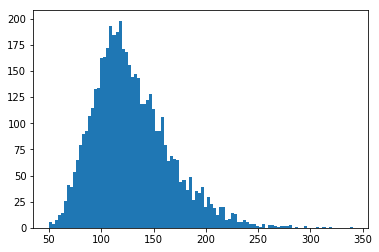

In [35]:
s = []
for i in range(len(aapl)):
    s.append(aapl[i][-1])
plt.hist(s, bins=100);
#from hist expected price ~ 130 

# price*rate of return
e = 119.21*1.0877
print(e)


4) What is the variance of the stock at the end of the year?

In [36]:
#Var[x] = E[(x-xbar)^2]
print(e**2)

16812.93883469008


5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [34]:
def dip_below_70(prices):  #how many universe has stock dip below 70
    for price in prices:
        if price <70:
            return 1
    return 0

indicator = [dip_below_70(prices) for prices in aapl]
np.average(indicator)   

0.042799999999999998

6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

In [37]:
def dip_below_100_and_back_to_110(prices):  #how many universe has stock dip below 70
    below_100 = False
    for price in prices:
        if price <100:
            below_100 = True
        if below_100 and price > 110:
            return 1
    return 0

indi= [dip_below_100_and_back_to_110(prices) for prices in aapl]
np.average(indi)   

0.26200000000000001

### Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

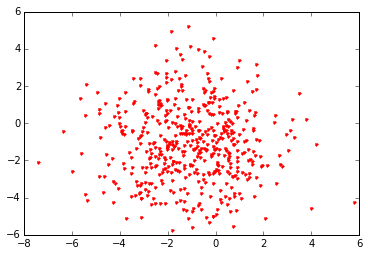

In [9]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [1]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 25 27 ..., 40  0 54]
 [25  0 64 ...,  0  0  8]
 [27 64  0 ...,  0 69 45]
 ..., 
 [40  0  0 ...,  0 25 70]
 [ 0  0 69 ..., 25  0 66]
 [54  8 45 ..., 70 66  0]]


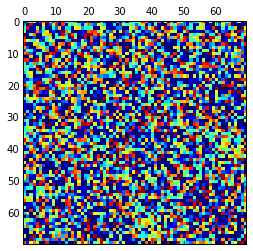

In [105]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print student

plt.matshow(student)

### Simulated Annealing

1) What's wrong with Hill Climbing?

2) What is the main idea for fixing that?

3) Implement the exam scheduling again with Simulated Annealing